In [1]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size: 18px;
}

div.output_area pre {
    font-size: 16px;
}
</style>

In [2]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

# Phần I: phương trình y = ax + b

In [3]:
# Giả sử y = 2x + 3
a = 2
b = 3

# Khởi tạo dãy các giá trị x
x = [1,2,3,4,5,6,7,8,9,10]

# Tính các giá trị của y tương ứng từng giá trị x
y = [a*xi + b for xi in x]

print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


## Hàm vẽ đơn giản: plt.plot()

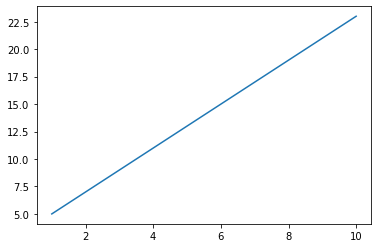

In [4]:
plt.plot(x,y)
plt.show()

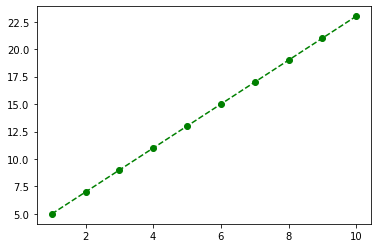

In [5]:
# Thêm một số trang trí cho đẹp hơn
plt.plot(x,y, marker='o', color="green", linestyle="dashed")
plt.show()

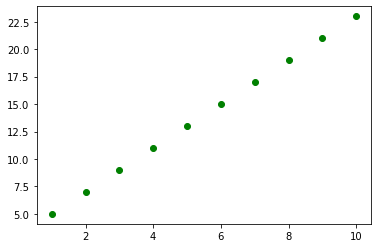

In [6]:
# Vẽ các điểm dữ liệu, không cần vẽ đường
plt.scatter(x,y, color="green")
plt.show()

## Ứng dụng của y=ax + b?
- Đây là phương trình tuyến tính rất đơn giản, từ học sinh cấp 2 đã biết rõ. Nhưng bạn có biết, đây chính là phương trình cơ sở của phương pháp Linear Regression (Hồi Quy Tuyến Tính) ứng dụng rất rộng rãi trong Kinh tế (VD: Dự đoán giá của một sản phẩm, như giá nhà, doanh thu bán hàng...).
- Đặc biệt hơn, đây chính là phương trình cơ sở của một neural (nơ-ron) trong Mạng neural nhân tạo, chính là thứ cơ bản nhất giúp mạng neural hoạt động, tạo ra sự phát triển rực rỡ của AI và Deep Learning ngày nay. Hiện nay phương trình hay dùng nhất trong Deep Learning là y = RELU(ax + b), với RELU là hàm kích hoạt (activation) nhưng chỉ đơn giản là gán y = 0 nếu ax + b < 0, ngược lại thì cứ gán theo đúng phương trình y = ax+b.

# Phần II: Demo Linear Regression đơn giản

## 1. Mô tả vấn đề 
Ví dụ 1 quán cafe quan sát thấy nếu lượng khách đông thì doanh thu tăng lên.

Giả sử doanh thu được tạo ra bởi hàm y = 5x - 10 (Doanh thu = 5*số-khách - 10) và cộng/trừ một lượng không chắc chắn nào đó (còn tùy vào giá tiền món được gọi, và khách có lấy tiền thừa hay ko)

Trên thực tế ta không biết hàm y = 5x - 10 này, mà chỉ quan sát được dữ liệu và cố gắng tìm ra hàm đó để dự đoán dữ liệu khác.

Hồi quy tuyến tính giúp tìm ra một hàm gần giống với hàm đó và có thể dùng để dự đoán được, gọi là hàm xấp xỉ.

In [7]:
N = 200
a = 5
b = -10
# tien = 5*so_luong_khach - 10
so_luong_khach = np.arange(50,50+N,5)
print(so_luong_khach)

[ 50  55  60  65  70  75  80  85  90  95 100 105 110 115 120 125 130 135
 140 145 150 155 160 165 170 175 180 185 190 195 200 205 210 215 220 225
 230 235 240 245]


In [8]:
tien_ngau_nhien = np.random.normal(0,50, [N//5])
doanh_thu = tien_ngau_nhien + a*so_luong_khach + b

print(doanh_thu)

[ 219.514  306.045  267.249  358.461  261.077  364.252  357.638  393.818
  473.195  528.398  533.091  519.72   579.691  585.697  537.105  617.61
  585.358  722.611  705.425  729.799  775.559  865.227  748.42   850.219
  787.369  846.224  835.166  852.856  979.572  913.47   984.922 1049.739
 1062.902  939.791 1084.504 1064.39  1151.702 1137.96  1134.692 1226.057]


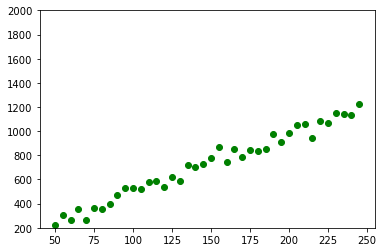

In [9]:
fig, ax = plt.subplots(figsize=(6,4), num=1)
plt.ylim([200, 2000])
ax.scatter(so_luong_khach, doanh_thu, c='green')
plt.show()

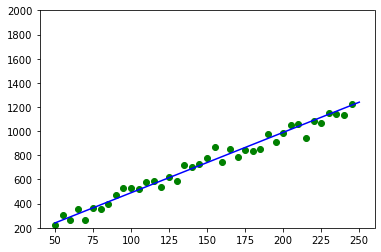

In [10]:
# Hàm vẽ phương trình y = ax + b
def Ve_phuong_trinh(heso_a, heso_b, mau='red'):
    x1,x2 = 50, 250
    
    y1 = heso_a*x1 + heso_b
    y2 = heso_a*x2 + heso_b
    plt.plot([x1,x2],[y1,y2], color=mau)
    

fig = plt.figure(figsize=(6,4))
plt.ylim([200, 2000])
plt.scatter(so_luong_khach, doanh_thu, color="green")

Ve_phuong_trinh(a,b, mau="blue")
plt.show()

## 2. Cách thực hiện Linear Regression
Ở hình trên, các chấm màu green là dữ liệu thực, đường màu xanh blue là hàm y=5x-10.

Ở đây, ta chỉ có thể dựa vào dữ liệu (các chấm màu green) để đi tìm hàm nào phù hợp với dữ liệu đó.

Vì ta không biết a và b, nên khởi tạo "đại" một số nào đó, ví dụ a=10, b=10.

In [11]:
# Khởi tạo và kiểm tra mô hình
khoi_tao_A = 10.
khoi_tao_B = 9.

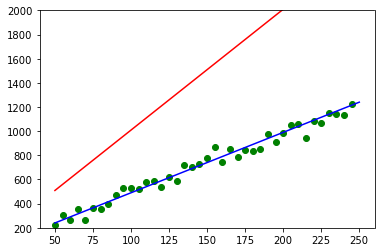

In [12]:
fig = plt.figure(figsize=(6,4))
plt.ylim([200, 2000])
plt.scatter(so_luong_khach, doanh_thu, color="green")

Ve_phuong_trinh(a,b, mau="blue")

Ve_phuong_trinh(khoi_tao_A, khoi_tao_B, mau="red")

plt.show()

Ở hình trên, đường khởi tạo (màu đỏ) có khoảng cách khá xa so với dữ liệu.

Tiếp theo, ta sẽ tính gradient để cập nhật giá trị của a,b. Lặp đi lặp lại quá trình này nhiều lần sẽ giúp thay đổi giá trị của a và b theo hướng càng ngày càng gần với dữ liệu.

Để tính gradient, ở đây sử dụng 1 hàm tính lỗi của mô hình, gọi là Root Mean Squared Error (rmse)

In [13]:
# Hàm tính lỗi RMSE
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2))

# Hàm Hồi Quy Tuyến Tính, trả về 2 số a và b của mô hình cần tìm
def HoiQuy_TuyenTinh(x, y, he_so_huan_luyen=0.000001, so_lan_hoc=50):
    a = khoi_tao_A
    b = khoi_tao_B
    
    # Lặp đi lặp lại quá trình cập nhật a và b
    for i in range(so_lan_hoc):
        y_du_doan = x*a + b
        error = rmse(y_du_doan, y)
        #error = y_du_doan - y
        
        if i%5 == 0: print(f"Lần huấn luyện {i}. Lỗi của model:", np.abs(error).mean())
        
        # Tính gradient
        gradient_a = (x * error).mean()
        gradient_b = error.mean()
        
        # Cập nhật a và b
        a = a - he_so_huan_luyen * gradient_a
        b = b - he_so_huan_luyen * gradient_b
    return a,b

new_a, new_b = HoiQuy_TuyenTinh(so_luong_khach, doanh_thu)
print("Giá trị mới của a và b:", new_a, new_b)

Lần huấn luyện 0. Lỗi của model: 760.5876841340875
Lần huấn luyện 5. Lỗi của model: 669.8163526863673
Lần huấn luyện 10. Lỗi của model: 589.8743602708981
Lần huấn luyện 15. Lỗi của model: 519.4697286629984
Lần huấn luyện 20. Lỗi của model: 457.4646171830461
Lần huấn luyện 25. Lỗi của model: 402.8569335453752
Lần huấn luyện 30. Lỗi của model: 354.7641385975573
Lần huấn luyện 35. Lỗi của model: 312.40898321123376
Lần huấn luyện 40. Lỗi của model: 275.10694681202364
Lần huấn luyện 45. Lỗi của model: 242.25517453698149
Giá trị mới của a và b: 6.28987695448241 8.978199307827518


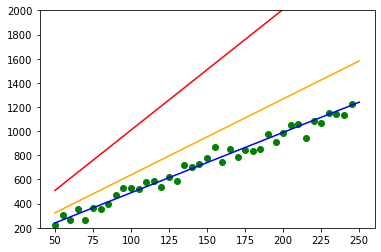

In [14]:
fig = plt.figure(figsize=(6,4))
plt.ylim([200, 2000])

plt.scatter(so_luong_khach, doanh_thu, color="green")
Ve_phuong_trinh(a,b, mau='blue')
Ve_phuong_trinh(khoi_tao_A, khoi_tao_B, mau="red")
Ve_phuong_trinh(new_a, new_b, mau="orange")

plt.show()

Sau khi được huấn luyện (50 lần), từ đường màu đỏ ban đầu, đường màu cam đã tiến sát vào dữ liệu.

Dưới đây sẽ thử thực hiện huấn luyện lại với 100 lần. Kết quả là đường màu cam gần sát vào đường màu xanh blue, nghĩa là khả năng xấp xỉ của a và b tìm được là rất tốt.

In [15]:
new_a, new_b = HoiQuy_TuyenTinh(so_luong_khach, doanh_thu, 
                                 he_so_huan_luyen=0.000001, 
                                 so_lan_hoc=100)
print("Gia tri cua a va b sau khi hoc:", new_a, new_b)

Lần huấn luyện 0. Lỗi của model: 760.5876841340875
Lần huấn luyện 5. Lỗi của model: 669.8163526863673
Lần huấn luyện 10. Lỗi của model: 589.8743602708981
Lần huấn luyện 15. Lỗi của model: 519.4697286629984
Lần huấn luyện 20. Lỗi của model: 457.4646171830461
Lần huấn luyện 25. Lỗi của model: 402.8569335453752
Lần huấn luyện 30. Lỗi của model: 354.7641385975573
Lần huấn luyện 35. Lỗi của model: 312.40898321123376
Lần huấn luyện 40. Lỗi của model: 275.10694681202364
Lần huấn luyện 45. Lỗi của model: 242.25517453698149
Lần huấn luyện 50. Lỗi của model: 213.32273422807035
Lần huấn luyện 55. Lỗi của model: 187.84203580057138
Lần huấn luyện 60. Lỗi của model: 165.40127431101334
Lần huấn luyện 65. Lỗi của model: 145.63777459367014
Lần huấn luyện 70. Lỗi của model: 128.2321299053257
Lần huấn luyện 75. Lỗi của model: 112.90303985032787
Lần huấn luyện 80. Lỗi của model: 99.45428723479819
Lần huấn luyện 85. Lỗi của model: 88.30275422405494
Lần huấn luyện 90. Lỗi của model: 78.75207123446157
Lần hu

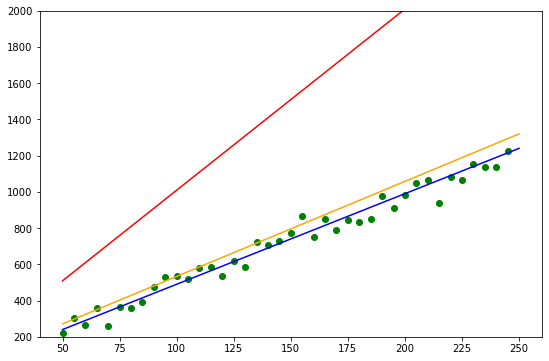

In [16]:
fig = plt.figure(figsize=(9,6))
plt.ylim([200, 2000])

plt.scatter(so_luong_khach, doanh_thu, color="green")
Ve_phuong_trinh(a,b, mau='blue')
Ve_phuong_trinh(khoi_tao_A, khoi_tao_B, mau="red")
Ve_phuong_trinh(new_a, new_b, mau="orange")

plt.show()

In [17]:
# Dự đoán doanh thu khi khách lên 300 (chưa bao giờ đạt tới trước đây nên không có trong dữ liệu)
so_khach_du_kien = 300
doanh_thu_du_kien = so_khach_du_kien*new_a + new_b
print(doanh_thu_du_kien)

1582.25937517164


## Lưu ý:
- Trên thực tế, tới đây ta vẫn không biết hàm y=5x - 10.
- Các giá trị he_so_huan_luyen=0.00001, so_lan_hoc=40 chỉ có tác dụng trong demo này. Có thể không hoạt động tốt nếu thay đổi thông số.

In [18]:
so_luong_khach = np.arange(50,50+N,5)
print(so_luong_khach)
print(doanh_thu)
# y = ax + b: a = 5, b = -10

[ 50  55  60  65  70  75  80  85  90  95 100 105 110 115 120 125 130 135
 140 145 150 155 160 165 170 175 180 185 190 195 200 205 210 215 220 225
 230 235 240 245]
[ 219.514  306.045  267.249  358.461  261.077  364.252  357.638  393.818
  473.195  528.398  533.091  519.72   579.691  585.697  537.105  617.61
  585.358  722.611  705.425  729.799  775.559  865.227  748.42   850.219
  787.369  846.224  835.166  852.856  979.572  913.47   984.922 1049.739
 1062.902  939.791 1084.504 1064.39  1151.702 1137.96  1134.692 1226.057]


## 3. Sử dụng hàm `np.polyfit`

In [19]:
hs_a, hs_b = np.polyfit(so_luong_khach, doanh_thu, deg=1)
print(hs_a, hs_b)

4.830605738876432 10.897969381638752


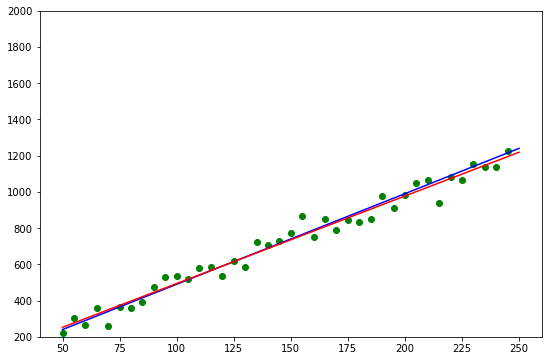

In [20]:
fig = plt.figure(figsize=(9,6))
plt.ylim([200, 2000])

plt.scatter(so_luong_khach, doanh_thu, color="green")
Ve_phuong_trinh(a,b, mau='blue')
Ve_phuong_trinh(hs_a, hs_b, mau="red")

plt.show()

In [21]:
# Dự đoán khi số lượng khách là 300
hs_a*300 + hs_b

1460.0796910445686

**Sử dụng hàm `np.poly1d` để tạo regression model**

In [22]:
my_model = np.poly1d((hs_a, hs_b))

In [23]:
my_model(300)

1460.0796910445686

## 4. Sử dụng hàm `stats.linregress`

In [24]:
from scipy import stats
kq = stats.linregress(so_luong_khach, doanh_thu)
kq

LinregressResult(slope=4.830605738876433, intercept=10.897969381638745, rvalue=0.987551734723829, pvalue=3.8857491294911943e-32, stderr=0.12481407909034832, intercept_stderr=19.769344500614345)

In [25]:
hs_a = kq[0]
hs_b = kq[1]
print(hs_a, hs_b)

4.830605738876433 10.897969381638745
